## 6.5 Unsupervised Machine Learning: Clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where we import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# To ensures the graphs we create are displayed in the notebook without the need to "call" them specifically, we use the code below

%matplotlib inline

In [3]:
# Assign the path of the Gun Violence data folder to the variable 'path'.
path = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A6\Gun Violence'

In [4]:
# import clean data df_gv_clean.pkl
df_gv_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_gv_clean.pkl'))

In [5]:
df_gv_clean.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,age_group_classification,severity_of_incident
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,Known Age Group,Mass Shooting
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group,Mass Shooting
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group,Mass Shooting


### 2. Data cleaning and manipulation:
Data cleaning was alraedy performed in the previous exercise. df_gv_clean is clean already. 
However, as k-means algorithm can only handle numerical variables, I will create a subset of the data frame which only contains numerical variable. I will call it df_gv_clean_num

In [11]:
# Creating a subset of the dataframe with the specified columns
df_gv_clean_num = df_gv_clean[['incident_id', 'n_killed', 'n_injured', 'latitude', 'longitude']]

In [12]:
df_gv_clean_num.head()

,incident_id,n_killed,n_injured,latitude,longitude
0,461105,0,4,40.3467,-79.8559
1,460726,1,3,33.9090,-118.3330
2,478855,1,3,41.4455,-82.1377
3,478925,4,0,39.6518,-104.8020
4,478959,2,2,36.1140,-79.9569


### 3. The elbow technique

In [13]:
num_cl = range(1, 8) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_gv_clean_num).score(df_gv_clean_num) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1.9835769563592196e+16,
 -4792428953412168.0,
 -2108134024011885.5,
 -1200905159263695.0,
 -715802553889923.6,
 -488692042591738.75,
 -356401533926938.6]

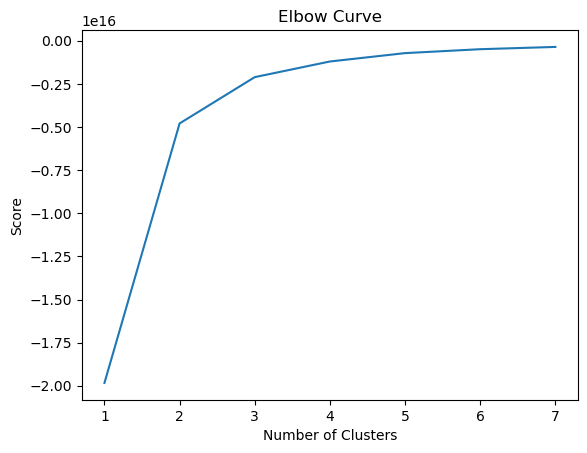

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Number of Clusters: 
From the curve above, it appears that the elbow point is at the number of clusters equal to 3. This suggests that increasing the number of clusters beyond 3 does not provide substantial improvement in the variance explained by the model. Therefore, the optimum number of clusters for this K-Means clustering analysis would likely be 3.

### 5. K-means clustering

In [16]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data.
kmeans.fit(df_gv_clean_num)

C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### 6. Attach a new column to the dataframe with the resulting clusters

In [24]:
# to create a column in the dataframe with values corresponding to which cluster every observation belongs
df_gv_clean_num['clusters'] = kmeans.fit_predict(df_gv_clean_num)

C:\Users\ramis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramis\AppData\Local\Temp\ipykernel_26376\4025003394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gv_clean_num['clusters'] = kmeans.fit_predict(df_gv_clean_num)


In [26]:
df_gv_clean_num.head()

,incident_id,n_killed,n_injured,latitude,longitude,clusters
0,461105,0,4,40.3467,-79.8559,2
1,460726,1,3,33.9090,-118.3330,2
2,478855,1,3,41.4455,-82.1377,2
3,478925,4,0,39.6518,-104.8020,2
4,478959,2,2,36.1140,-79.9569,2


In [28]:
# check how many observations fall into each cluster
df_gv_clean_num['clusters'].value_counts()

clusters
1    78529
0    78165
2    75060
Name: count, dtype: int64

C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


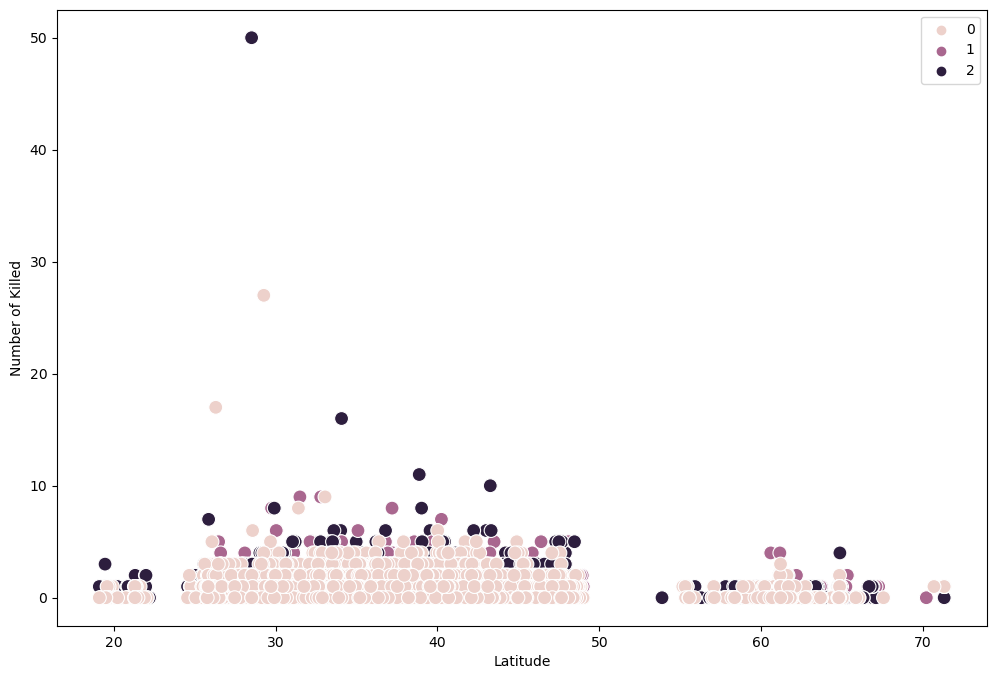

In [29]:
# Plot the clusters for the "n_killed" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gv_clean_num['latitude'], y=df_gv_clean_num['n_killed'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('Number of Killed') # Label y-axis.
plt.show()

C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


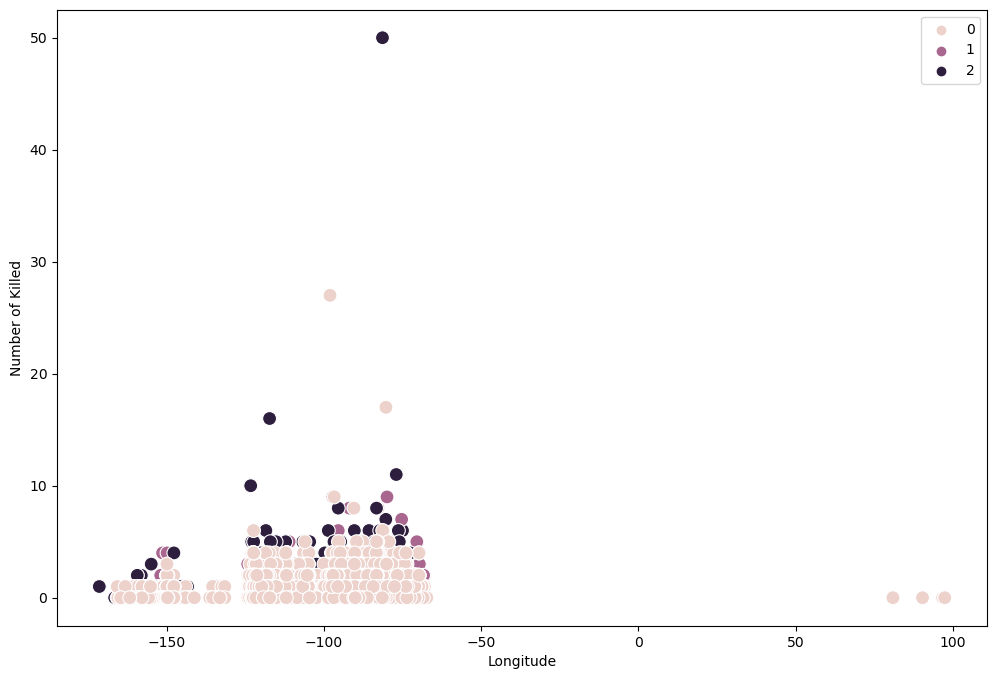

In [30]:
# Plot the clusters for the "n_killed" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gv_clean_num['longitude'], y=df_gv_clean_num['n_killed'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('Number of Killed') # Label y-axis.
plt.show()

###  8. Discussing the clusters:
-The 'n_killed' against 'latitude' cluster: The clustering appears to group the data points primarily based on the number of people killed, with distinct ranges for each cluster. For instance, the cluster labeled '0' might represent incidents with fewer fatalities, while '1' and '2' represent incidents with progressively more fatalities. If latitude plays a role in the clustering, it could be indicative of geographical patterns in the data. However, from the scatterplot alone, the latitude does not seem to be a strong clustering factor compared to the number of people killed.

-The 'n_killed' against 'longitude' cluster: the clustering appears to be influenced more significantly by the number of people killed than by the longitude, as the clusters are mainly stratified horizontally.
Cluster '0' seems to correspond to incidents with a lower number of fatalities, while clusters '1' and '2' likely represent incidents with a higher number of fatalities. The spread across longitudes does not display a clear pattern for clustering, suggesting that the number of fatalities does not strongly correlate with the longitude within this dataset.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function

In [31]:
# map the numerical cluster identifiers (0, 1, 2) to a descriptive color label
df_gv_clean_num.loc[df_gv_clean_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_gv_clean_num.loc[df_gv_clean_num['clusters'] == 1, 'cluster'] = 'purple'
df_gv_clean_num.loc[df_gv_clean_num['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\ramis\AppData\Local\Temp\ipykernel_26376\1659513632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gv_clean_num.loc[df_gv_clean_num['clusters'] == 2, 'cluster'] = 'dark purple'
C:\Users\ramis\AppData\Local\Temp\ipykernel_26376\1659513632.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_gv_clean_num.loc[df_gv_clean_num['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
df_gv_clean_num.head()

,incident_id,n_killed,n_injured,latitude,longitude,clusters,cluster
0,461105,0,4,40.3467,-79.8559,2,dark purple
1,460726,1,3,33.9090,-118.3330,2,dark purple
2,478855,1,3,41.4455,-82.1377,2,dark purple
3,478925,4,0,39.6518,-104.8020,2,dark purple
4,478959,2,2,36.1140,-79.9569,2,dark purple


In [33]:
df_gv_clean_num.groupby('cluster').agg({'longitude':['mean', 'median'], 
                         'latitude':['mean', 'median'], 
                          'n_killed':['mean', 'median']})

longitude             latitude            n_killed       
                  mean    median       mean    median      mean median
cluster                                                               
dark purple -89.466956 -86.57825  37.667019  38.67045  0.243205    0.0
pink        -89.562260 -86.72330  37.573834  38.60660  0.251238    0.0
purple      -88.992548 -85.66220  37.404387  38.24610  0.245578    0.0

#### Discussing the descriptive statistics of the clusters:
The groupby summary shows that there are three clusters characterized by their longitude, latitude, and number of people killed (n_killed). The mean and median values for longitude and latitude are similar across clusters, which implies that the clusters might not be geographically distinct. For the 'n_killed' statistic, the mean is slightly above 0 for all clusters, but the median is 0. This suggests that the majority of incidents in all clusters have no fatalities, but the mean is slightly higher due to a small number of incidents with higher fatalities. This could mean that while there are incidents with multiple fatalities, they are not common within the clusters. The clusters are likely defined by other variables not shown in this summary.

### 10. Proposal for future steps of an analytics pipeline:
In further analysis, clusters could be analyzed for additional patterns or correlations with socio-economic or demographic data to understand underlying factors of gun violence in USA.
Furthermore, cluster characteristics can be used as features in predictive models to forecast gun violence incidents and their potential severity.